# PRML Lab 9
    Ayush Abrol B20AI052
---    

## Question 1

### Reading and preprocessing of data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('wine.data', header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
attribute_names = ['Classes', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.columns = attribute_names
df

,Classes,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Classes                       178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
df.describe()

,Classes,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [6]:
unscaled_columns = ['Malic acid', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Proanthocyanins', 'Color intensity', 'OD280/OD315 of diluted wines', 'Proline']

In [7]:
scalar = StandardScaler()
for i in unscaled_columns:
    df[i] = scalar.fit_transform(df[i].values.reshape(-1, 1))

In [8]:
df

,Classes,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,-0.562250,2.43,-1.169593,1.913905,0.808997,1.034819,0.28,1.224884,0.251717,1.04,1.847920,1.013009
1,1,13.20,-0.499413,2.14,-2.490847,0.018145,0.568648,0.733629,0.26,-0.544721,-0.293321,1.05,1.113449,0.965242
2,1,13.16,0.021231,2.67,-0.268738,0.088358,0.808997,1.215533,0.30,2.135968,0.269020,1.03,0.788587,1.395148
3,1,14.37,-0.346811,2.50,-0.809251,0.930918,2.491446,1.466525,0.24,1.032155,1.186068,0.86,1.184071,2.334574
4,1,13.24,0.227694,2.87,0.451946,1.281985,0.808997,0.663351,0.39,0.401404,-0.319276,1.04,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,2.974543,2.45,0.301803,-0.332922,-0.985614,-1.424900,0.52,-0.930179,1.142811,0.64,-1.231206,-0.021952
174,3,13.40,1.412609,2.48,1.052516,0.158572,-0.793334,-1.284344,0.43,-0.316950,0.969783,0.70,-1.485445,0.009893
175,3,13.27,1.744744,2.26,0.151661,1.422412,-1.129824,-1.344582,0.43,-0.422075,2.224236,0.59,-1.485445,0.280575
176,3,13.17,0.227694,2.37,0.151661,1.422412,-1.033684,-1.354622,0.53,-0.229346,1.834923,0.60,-1.400699,0.296498


In [9]:
values, counts = np.unique(df['Classes'], return_counts=True)
print(values, counts)

[1 2 3] [59 71 48]


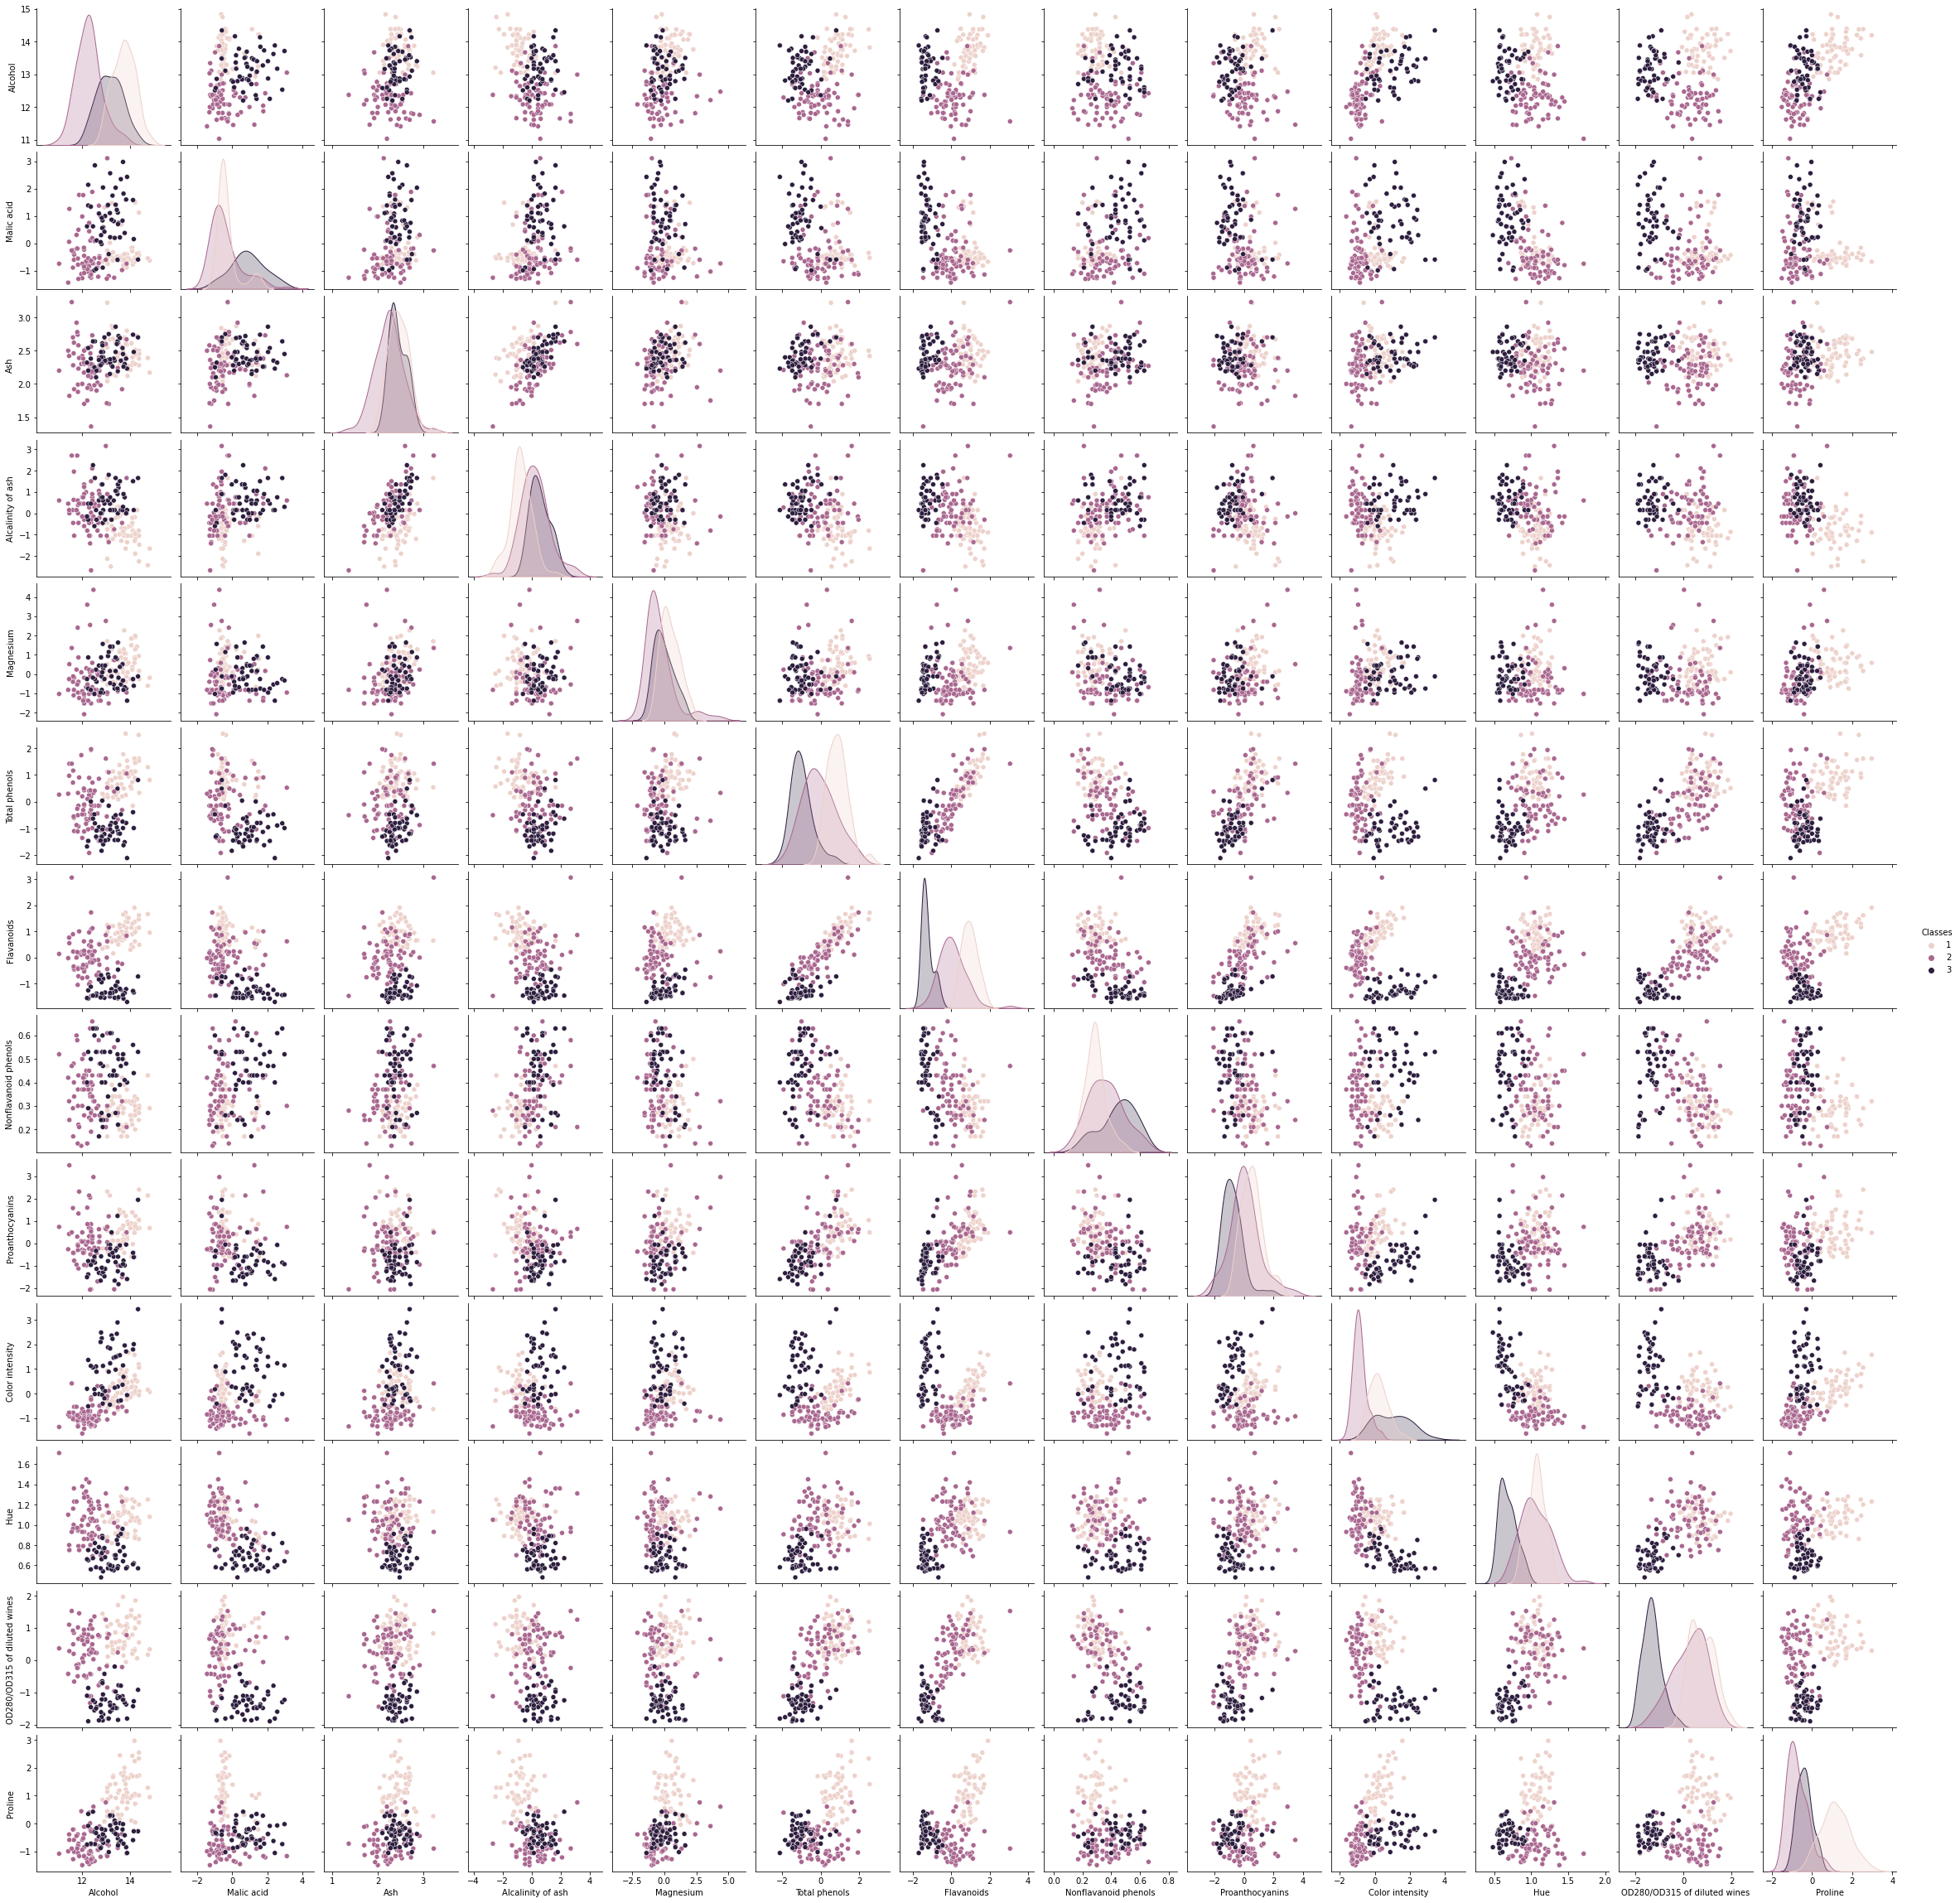

In [10]:
sns.pairplot(df, hue='Classes', vars=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])

In [11]:
X = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

# Manually encoding the classes

for i in range(len(y)):
    if y[i] == 3:
        y[i] = 0
    elif y[i] == 2:
        y[i] = 1
    elif y[i] == 1:
        y[i] = 2    
        

### Use any dimension reduction technique of your choice, visualize the data and by looking at the plot tell which value of k will be best suited for k-means clustering

In [12]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Using PCA

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

In [14]:
X_pca[0:5]

array([[ 3.29474410e+00,  1.01385042e+00],
       [ 1.98864952e+00, -1.50069562e-03],
       [ 2.57214214e+00,  4.43550007e-01],
       [ 4.00461539e+00,  1.99447403e+00],
       [ 1.07937412e+00,  1.32512053e-01]])

/home/ayushabrol/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

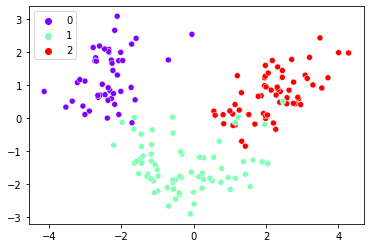

In [15]:
sns.scatterplot(X_pca[:, 0], X_pca[:, 1], hue=y, palette='rainbow')

### Using LDA

In [16]:
lda_model = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda_model.fit_transform(X, y)

In [17]:
X_lda[0:5]

array([[4.70024401, 1.97913835],
       [4.30195811, 1.17041286],
       [3.42071952, 1.42910139],
       [4.20575366, 4.00287148],
       [1.50998168, 0.4512239 ]])

/home/ayushabrol/.local/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

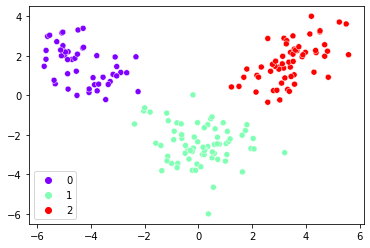

In [18]:
sns.scatterplot(X_lda[:, 0], X_lda[:, 1], hue=y, palette='rainbow')

The value of K is found to be 3 

### Build a k-means clustering algorithm( can use sklearn library) and implement using the value of k = 3

In [19]:
kmeans = KMeans(n_clusters=3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X_lda)

In [20]:
print("True Class Labels :- ")
print(y)

print("Predicted Class labels :- ")
print(kmeans.labels_)

True Class Labels :- 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted Class labels :- 
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


### Visualize part b by showing the clusters along with the centroids.

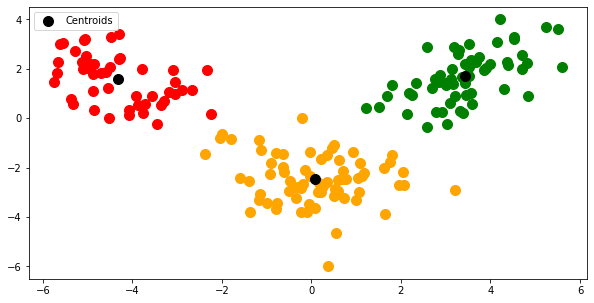

In [21]:
plt.figure(figsize=(10,5))
plt.scatter(X_lda[y_kmeans == 0, 0], X_lda[y_kmeans == 0, 1], s = 100, c = 'red',)
plt.scatter(X_lda[y_kmeans == 1, 0], X_lda[y_kmeans == 1, 1], s = 100, c = 'orange')
plt.scatter(X_lda[y_kmeans == 2, 0], X_lda[y_kmeans == 2, 1], s = 100, c = 'green')

#Plotting the centroids of the cluster
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'black', label = 'Centroids')

plt.legend()

### Use different values of k and find the Silhouette Score and then tell which value of k will be optimal and why?

[0.5284180423376319, 0.6631699986077089, 0.5930650579953534, 0.5020637525946954, 0.4076034119935575, 0.41642096190847794, 0.3827089541117063, 0.37945108913765413, 0.36771121724702377]


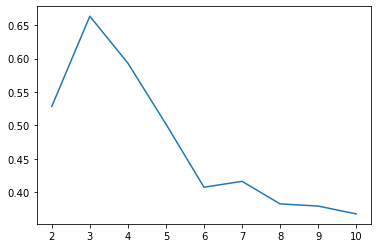

In [22]:
from sklearn.metrics import silhouette_score

list = [int(i) for i in range(2, 11)]
silhouette = []

for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    y_kmeans = kmeans.fit_predict(X_lda)
    new_score = silhouette_score(X_lda, y_kmeans, metric='euclidean')
    silhouette.append(new_score)
print(silhouette)

plt.plot(list, silhouette)
plt.show()

### There are few methods to find the optimal k value for k-means algorithm like the Elbow Method . Use the above method to find the optimal value of k.

In [23]:
from scipy.spatial.distance import cdist
 
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
 
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeanModel.fit(X_lda)
 
    distortions.append(sum(np.min(cdist(X_lda, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / X_lda.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(X_lda, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / X_lda.shape[0]
    mapping2[k] = kmeanModel.inertia_

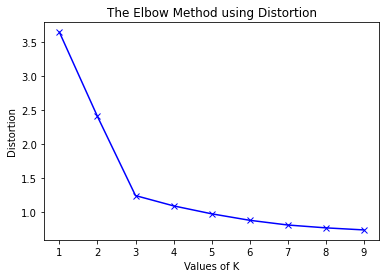

In [24]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

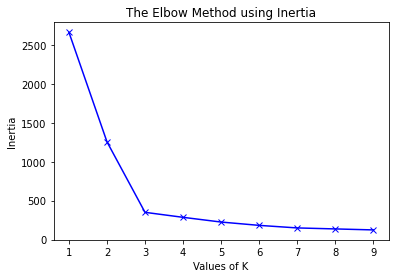

In [25]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

## Question 2

### Reading Data and preprocessing

In [26]:
mnist_train_data = pd.read_csv('fashion-mnist_train.csv')
mnist_train_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [27]:
mnist_test_data = pd.read_csv('fashion-mnist_test.csv')
mnist_test_data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [28]:
mnist_train_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000
mean,4.500000,0.000900,0.006150,0.035333,0.101933,0.247967,0.411467,0.805767,2.198283,5.682000,...,34.625400,23.300683,16.588267,17.869433,22.814817,17.911483,8.520633,2.753300,0.855517,0.07025
std,2.872305,0.094689,0.271011,1.222324,2.452871,4.306912,5.836188,8.215169,14.093378,23.819481,...,57.545242,48.854427,41.979611,43.966032,51.830477,45.149388,29.614859,17.397652,9.356960,2.12587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,16.000000,36.000000,226.000000,164.000000,227.000000,230.000000,224.000000,255.000000,254.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.00000


In [29]:
mnist_test_data.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,4.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,55.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000


In [30]:
print(mnist_train_data.shape)
print(mnist_test_data.shape)

(60000, 785)
(10000, 785)


In [31]:
mnist_train_data_X = mnist_train_data.iloc[:, 1:].values
mnist_train_data_y = mnist_train_data.iloc[:, 0].values
mnist_test_data_X = mnist_test_data.iloc[:, 1:].values
mnist_test_data_y = mnist_test_data.iloc[:, 0].values

In [32]:
print(mnist_train_data_X.shape)
print(mnist_train_data_y.shape)
print(mnist_test_data_X.shape)
print(mnist_test_data_y.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


### Implement a k-means clustering algorithm from scratch.

* Class which will be able to store the cluster centers.
* Take a value of k from users to give k clusters.
* Able to take initial cluster center points from the user as its initialization.
* Stop iterating when it converges (cluster centers are not changing anymore) or, a maximum iteration (given as max_iter by user) is reached.

In [33]:
class Kmeans_from_scratch:
    def __init__(self, k, max_iter = 300, n_init = 10, random_state=0):
        self.k = k
        self.max_iter = max_iter
        self.n_init = n_init
        self.random_state = random_state
        self.centroids = None
        self.labels = None
        
    def fit(self, X):
        self.centroids = self.init_centroids(X)
        self.labels = np.zeros(X.shape[0])
        for i in range(self.n_init):
            self.labels = self.assign_labels(X)
            self.centroids = self.update_centroids(X)

        num = 1
        while num < self.max_iter:
            centroids_old = self.centroids
            self.labels = self.assign_labels(X)
            self.centroids = self.update_centroids(X)
            if np.array_equal(centroids_old, self.centroids):
                break
            num += 1

        return self
    
    def init_centroids(self, X):
        centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            centroids[i] = X[np.random.randint(X.shape[0])]
        return centroids
    
    def assign_labels(self, X):
        labels = np.zeros(X.shape[0])
        for i in range(X.shape[0]):
            distances = np.linalg.norm(X[i] - self.centroids, axis=1)
            labels[i] = np.argmin(distances)
        return labels
    
    def update_centroids(self, X):
        new_centroids = np.zeros((self.k, X.shape[1]))
        for i in range(self.k):
            new_centroids[i] = np.mean(X[self.labels == i], axis=0)
        return new_centroids

In [38]:
k = int(input("Enter the number of clusters: "))
n_init = int(input("Enter the initial cluster center points: "))

### Train the k-means model on f-MNIST data with k = 10 and 10 random 784 dimensional points (in input range) as initializations.

In [39]:
model_kmeans = Kmeans_from_scratch(k = k, max_iter = 300, n_init = n_init)
model_kmeans = model_kmeans.fit(mnist_train_data_X)

In [40]:
centroids = model_kmeans.centroids
centroids.shape

(10, 784)

In [41]:
labels = model_kmeans.labels
labels.shape

(60000,)

In [42]:
print(labels)
print(len(labels))
print("The labels of the clusters are " + str(np.unique(labels)))

[0. 2. 7. ... 3. 0. 4.]
60000
The labels of the clusters are [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [43]:
label_dict = {0: 'T-shirt/top', 1: 'Trouser', 2: 'Pullover', 3: 'Dress', 4: 'Coat', 5: 'Sandal', 6: 'Shirt', 7: 'Sneaker', 8: 'Bag', 9: 'Ankle boot'}

In [44]:
print(mnist_train_data_y.shape)
unique_labels = np.unique(labels)
unique_labels = unique_labels.tolist()
for i in range(len(unique_labels)):
    unique_labels[i] = int(unique_labels[i])
print(unique_labels)

(60000,)
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


### Reporting the number of points in each cluster.

In [45]:
num_cluster = len(np.unique(labels))

cluster_indexes = [[] for i in range(num_cluster)]

for i,label in enumerate(labels):
    for n in range(num_cluster):
        if label == n:
            cluster_indexes[n].append(i)
        else:
            continue

print('After Clustering\n')
for i in range(num_cluster):
    print('No. of items in Cluster ' + str(i) + ': ' + str(len(cluster_indexes[i])))

After Clustering

No. of items in Cluster 0: 3720
No. of items in Cluster 1: 7391
No. of items in Cluster 2: 5838
No. of items in Cluster 3: 8273
No. of items in Cluster 4: 7632
No. of items in Cluster 5: 4271
No. of items in Cluster 6: 3849
No. of items in Cluster 7: 6213
No. of items in Cluster 8: 5140
No. of items in Cluster 9: 7673


### Visualize the cluster centers of each cluster as 2-d images of all clusters.

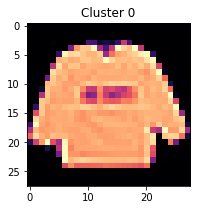

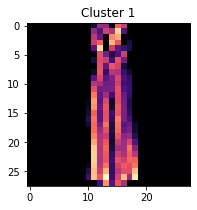

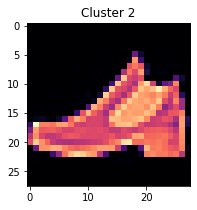

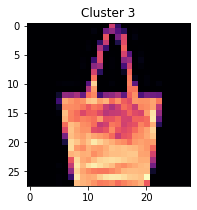

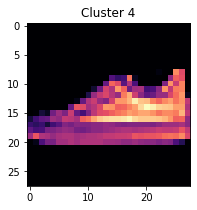

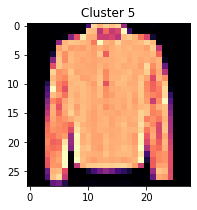

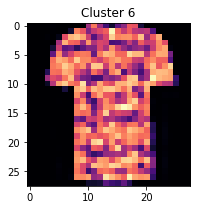

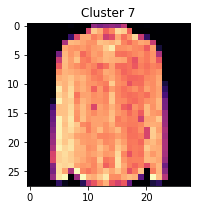

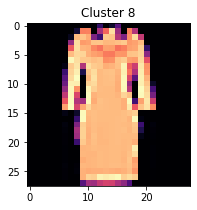

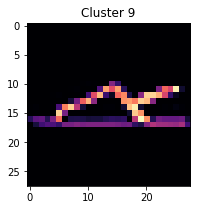

In [46]:
# Visualize the cluster centers of each cluster as 2-d images of all clusters.
def visualizing_clusters(X, centroids, labels):
    num_cluster = len(np.unique(labels))
    cluster_indexes = [[] for i in range(num_cluster)]
    for i,label in enumerate(labels):
        for n in range(num_cluster):
            if label == n:
                cluster_indexes[n].append(i)
            else:
                continue
   
    for j in range(len(cluster_indexes)):
        plt.figure(figsize=(3,3))
        val = X.iloc[cluster_indexes[j][0],:]
        val = val.values
        val = val.reshape(28, 28)
        plt.imshow(val, cmap='magma')
        plt.title('Cluster ' + str(j))
        plt.show()
X_f = pd.DataFrame(mnist_train_data_X)
visualizing_clusters(X_f, centroids, labels)

### Visualize 10 images corresponding to each cluster.

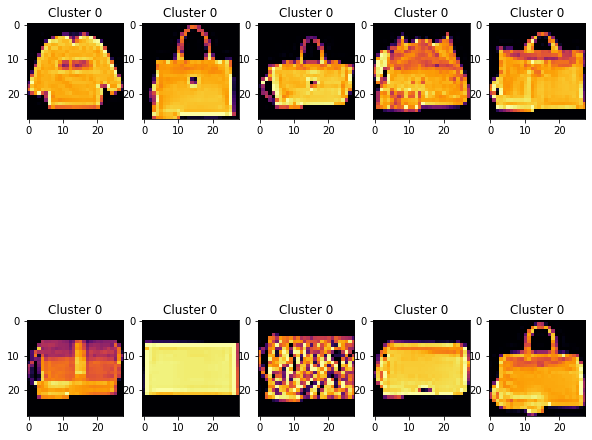

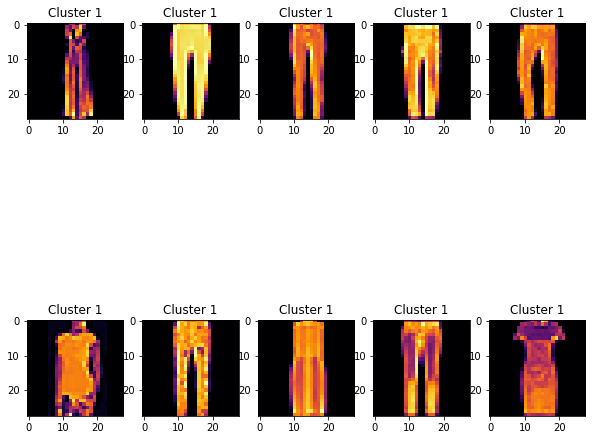

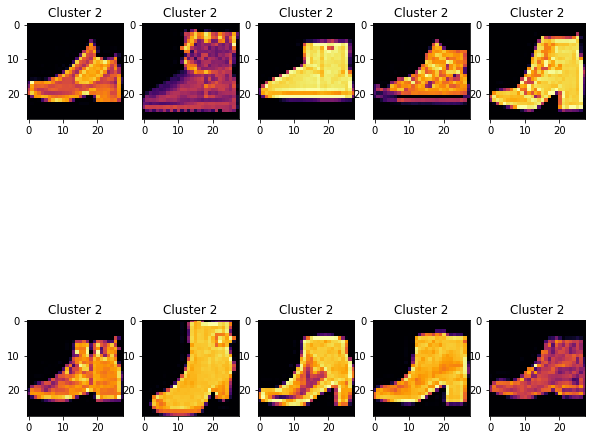

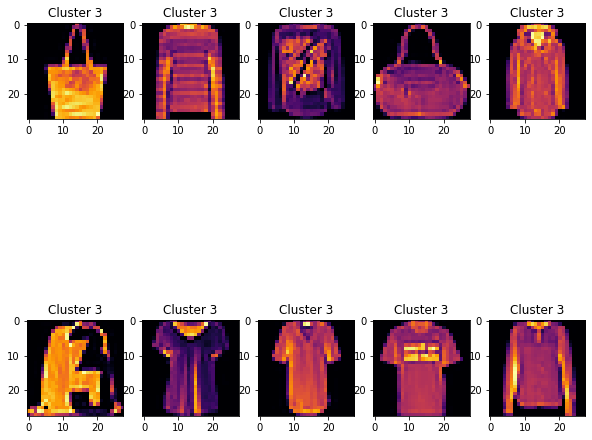

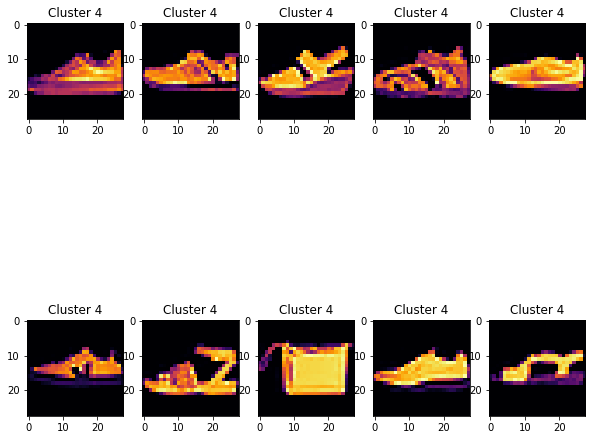

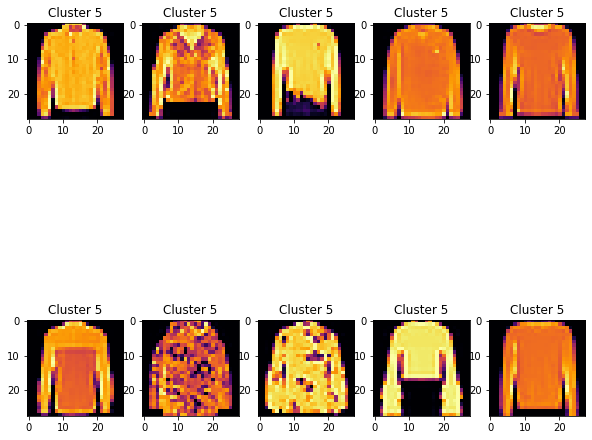

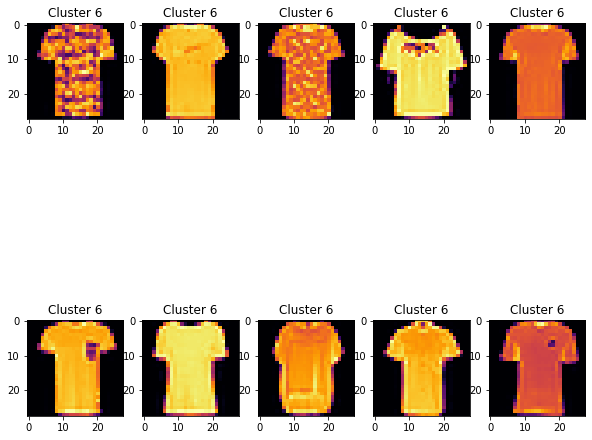

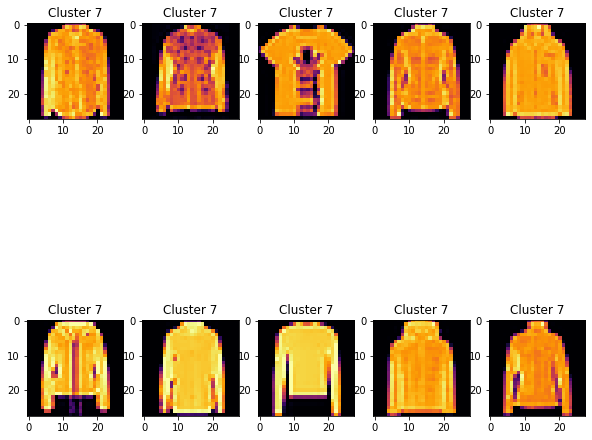

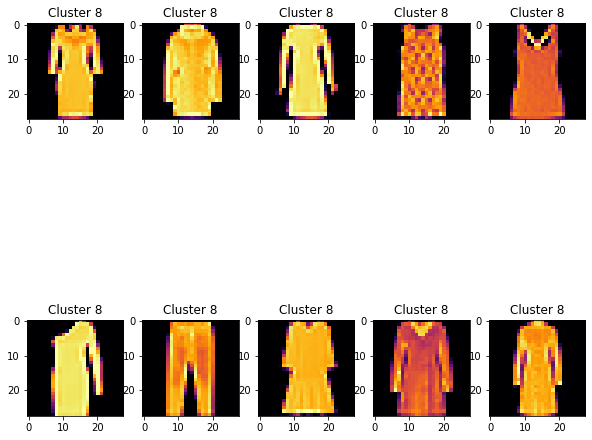

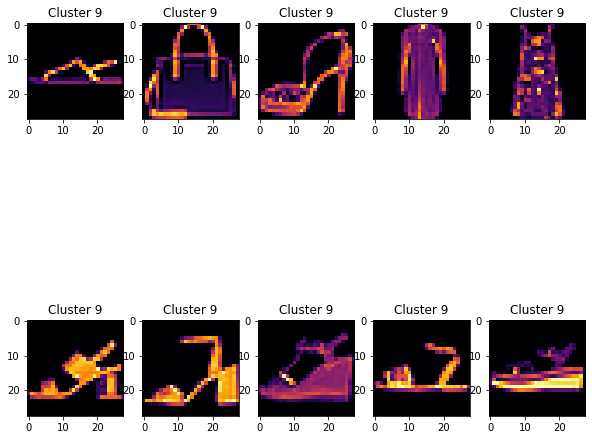

In [47]:
def visualizing_clusters_10(X, centroids, labels):
    num_cluster = len(np.unique(labels))
    cluster_indexes = [[] for i in range(num_cluster)]
    for i,label in enumerate(labels):
        for n in range(num_cluster):
            if label == n:
                cluster_indexes[n].append(i)
            else:
                continue
   
    for j in range(len(cluster_indexes)):
        plt.figure(figsize=(10,10))
        for i in range(10):
            plt.subplot(2,5,i+1)
            val = X.iloc[cluster_indexes[j][i],:]
            val = val.values
            val = val.reshape(28, 28)
            plt.imshow(val, cmap='inferno')
            plt.title('Cluster ' + str(j))
        plt.show()    

visualizing_clusters_10(X_f, centroids, labels)

### Train another k-means model with 10 images from each class as initializations,  report the number of points in each cluster and visualize the cluster centers.

In [48]:
kmeanModel_2 = Kmeans_from_scratch(k = 10, max_iter = 300, n_init = 10)
kmeanModel_2 = kmeanModel_2.fit(mnist_train_data_X)
centroids_2 = kmeanModel_2.centroids
labels_2 = kmeanModel_2.labels

In [49]:
num_cluster_2 = len(np.unique(labels_2))

cluster_indexes_2 = [[] for i in range(num_cluster_2)]

for i, label in enumerate(labels_2):
    for n in range(num_cluster_2):
        if label == n:
            cluster_indexes_2[n].append(i)
        else:
            continue

print('After 2nd Model Training from Clustering\n')
for i in range(num_cluster_2):
    print('No. of items in Cluster ' + str(i) + ': ' + str(len(cluster_indexes_2[i])))

After 2nd Model Training from Clustering

No. of items in Cluster 0: 4631
No. of items in Cluster 1: 10072
No. of items in Cluster 2: 2577
No. of items in Cluster 3: 2337
No. of items in Cluster 4: 9006
No. of items in Cluster 5: 4855
No. of items in Cluster 6: 6894
No. of items in Cluster 7: 8843
No. of items in Cluster 8: 7701
No. of items in Cluster 9: 3084


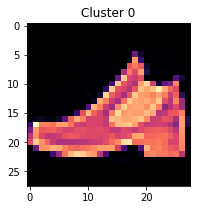

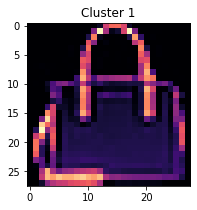

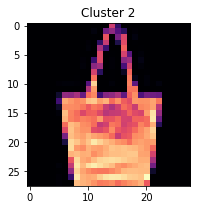

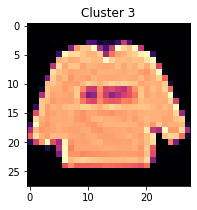

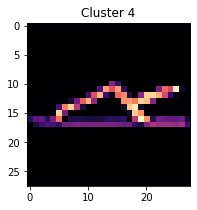

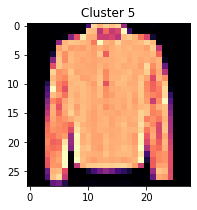

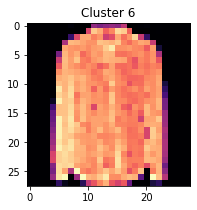

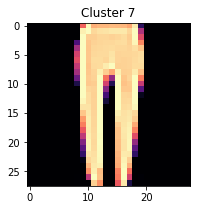

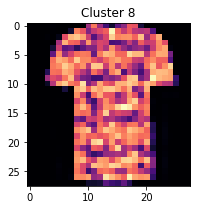

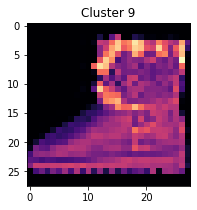

In [50]:
visualizing_clusters(X_f, centroids_2, labels_2)

### Visualize 10 images corresponding to each cluster.

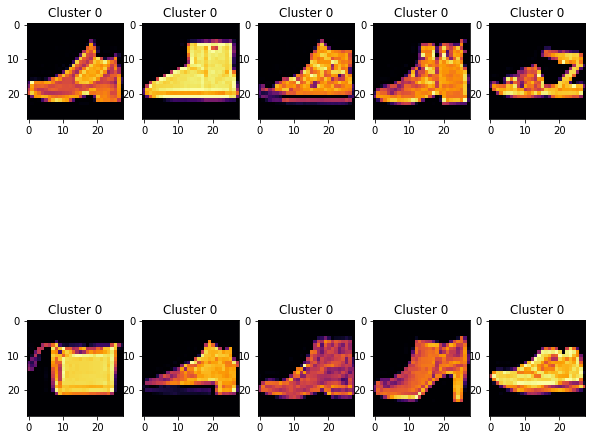

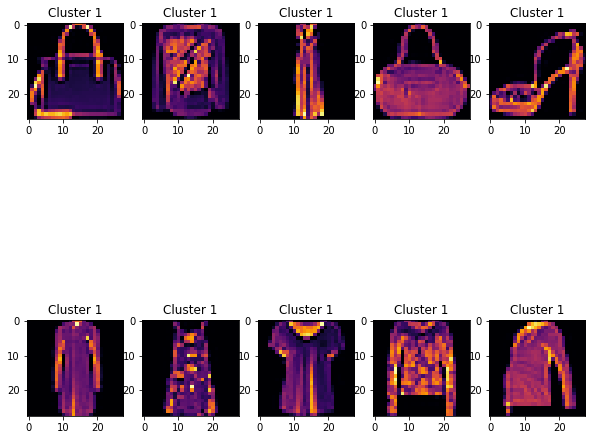

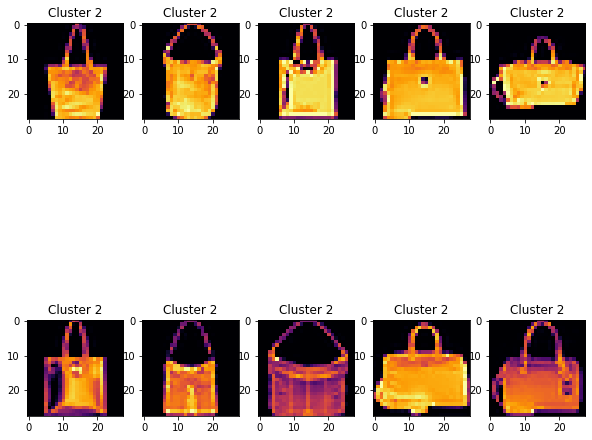

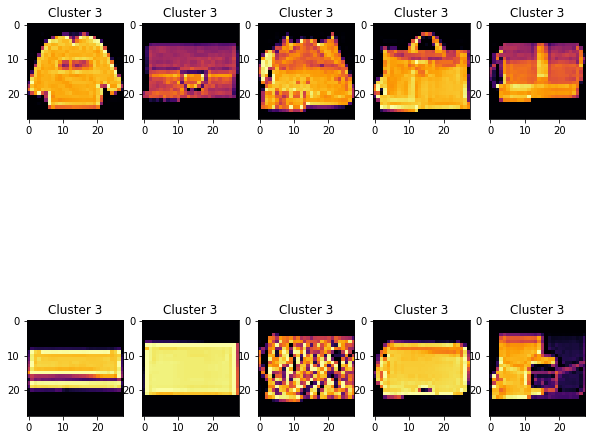

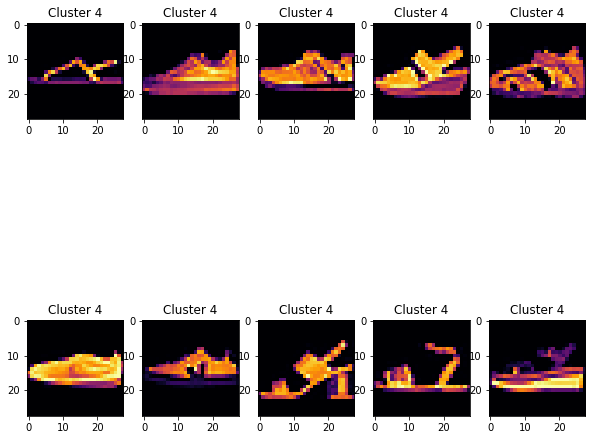

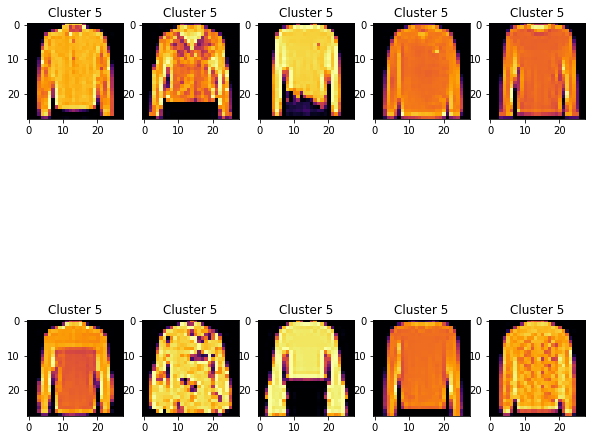

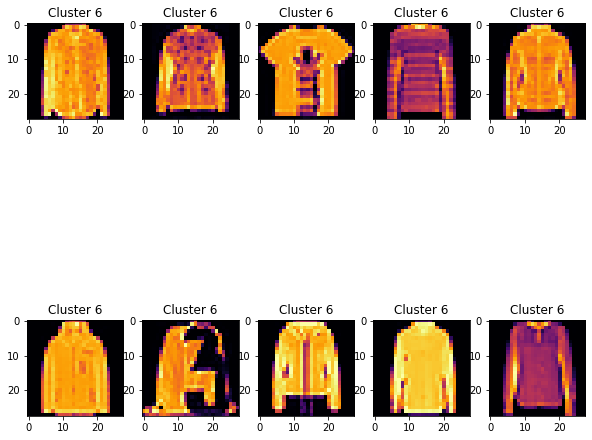

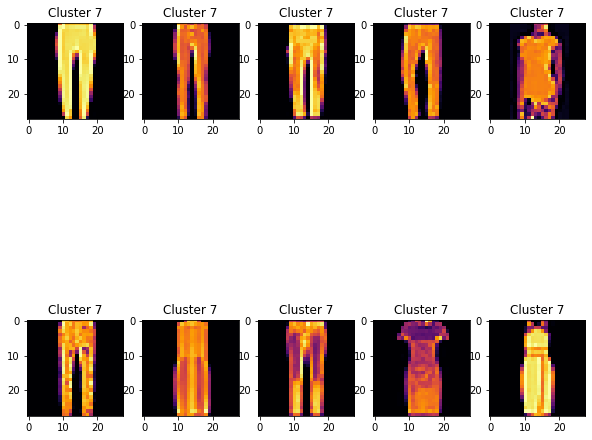

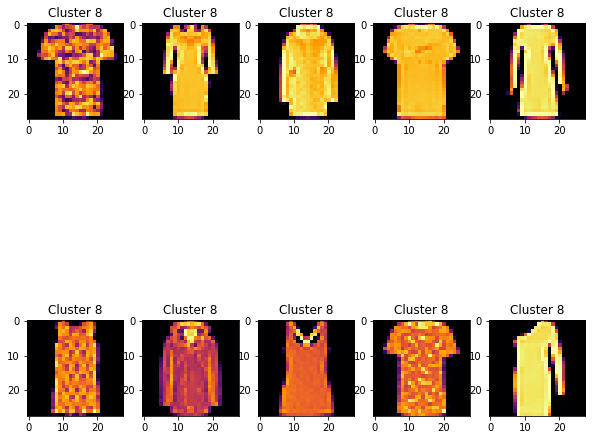

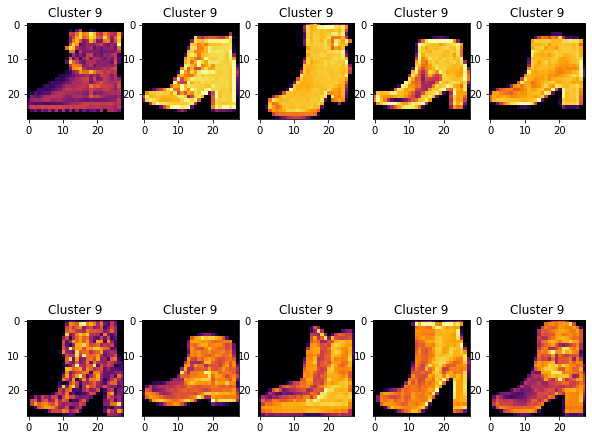

In [51]:
visualizing_clusters_10(X_f, centroids_2, labels_2)

### Visualizing number of images in each cluster.

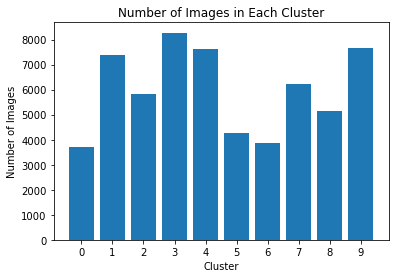

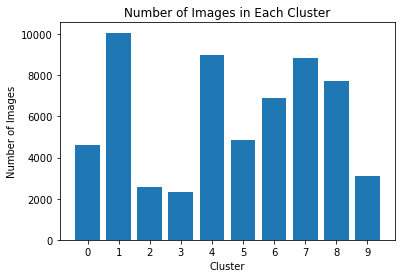

In [52]:
def cluster_visualization_using_bar_graphs(X, centroids, labels):
    num_cluster = len(np.unique(labels))
    cluster_indexes = [[] for i in range(num_cluster)]
    for i,label in enumerate(labels):
        for n in range(num_cluster):
            if label == n:
                cluster_indexes[n].append(i)
            else:
                continue

    plt.bar(np.arange(num_cluster), [len(cluster_indexes[i]) for i in range(num_cluster)])
    plt.xticks(np.arange(num_cluster), [str(i) for i in range(num_cluster)])
    plt.xlabel('Cluster')
    plt.ylabel('Number of Images')
    plt.title('Number of Images in Each Cluster')
    plt.show()

cluster_visualization_using_bar_graphs(X_f, centroids, labels)
cluster_visualization_using_bar_graphs(X_f, centroids_2, labels_2)

### Evaluate Clusters of part c and part f with Sum of Squared Error (SSE) method.

In [1]:
def Sum_Squared_Means(data, centroid, label):
    data = data.to_numpy()

    sum_error = 0
    for i in range(len(centroid)):
        for j in range(len(data[label==i])):
            sum_error += (np.sum(data[label==i] - centroid[i]))**2

    return np.sum(sum_error)

# Question 3

### Reading Data and preprocessing

In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import cv2
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import Normalizer
from sklearn.metrics import accuracy_score as acc 
from sklearn.decomposition import PCA

In [2]:
df = []
path = 'yesno'
for image in os.listdir(path):
    img = cv2.imread(os.path.join(path, image))
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    if 'y' in image.lower():
        df.append(np.append(cv2.resize(gray_img,(128,128)).flatten(),0))
    if 'n' in image.lower():
        df.append(np.append(cv2.resize(gray_img,(128,128)).flatten(),1))

df = pd.DataFrame(np.array(df)) 

In [3]:
df

,0,1,2,3,4,5,6,7,8,9,...,16375,16376,16377,16378,16379,16380,16381,16382,16383,16384
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2997,143,103,103,102,105,104,106,96,102,95,...,42,43,42,42,41,41,39,41,120,1
2998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [4]:
X_df = df.iloc[:,:-1]
y_df = df.iloc[:,-1]

### Use any dimension reduction technique and visualize the dataset & find out the number of communities available.

In [5]:
normalizer = Normalizer()
X_df = normalizer.fit_transform(X_df)

In [6]:
pca = PCA(n_components=2)
X_df = pca.fit_transform(X_df)

In [7]:
X_df.shape

(3000, 2)

### Visualize the communities from part A.

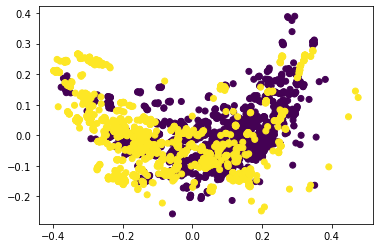

In [8]:
plt.scatter(X_df[:,0], X_df[:,1], c=y_df)

In [9]:
yes = X_df[y_df==0]
no = X_df[y_df==1]

### Apply Agglomerative hierarchical clustering (using sklearn).

In [10]:
clusterer = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
clusterer.fit(X_df)
preds = clusterer.labels_
print(acc(y_df, preds))

0.332


### Apply K-means (sklearn) and make a comparison between these two approaches

In [11]:
from sklearn.cluster import KMeans
kmeans_cluster = KMeans(n_clusters=2, max_iter=300, n_init=10)
kmeans_cluster.fit(X_df)
preds = kmeans_cluster.labels_
print(acc(y_df, preds))

0.31366666666666665
